In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
df = pd.read_csv("ANZ.csv")

In [3]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()

In [4]:
salary = []

for customer_id in df["customer_id"]:
    salary.append(int(df_salaries.loc[customer_id]["amount"]))

df["annual_salary"] =  salary

In [5]:
df= df[['age', 'annual_salary']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            12043 non-null  int64
 1   annual_salary  12043 non-null  int64
dtypes: int64(2)
memory usage: 188.3 KB


Text(0, 0.5, 'annual_salary')

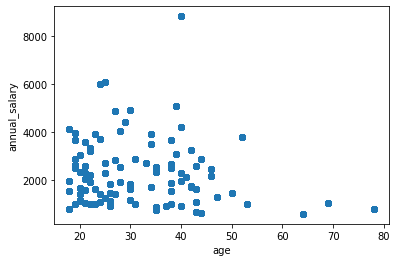

In [7]:
plt.scatter(df['age'],df['annual_salary'])
plt.xlabel('age')
plt.ylabel('annual_salary')

## Linear Regression

In [8]:
X=df.iloc[:,0:1].values
y=df.iloc[:,1].values

In [9]:
X

array([[26],
       [26],
       [38],
       ...,
       [28],
       [69],
       [31]])

In [10]:
y

array([1013, 1013, 1002, ..., 4054, 1043,  996])

In [11]:
print(X.shape)
print(y.shape)

(12043, 1)
(12043,)


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
print(X_train.shape)
print(X_test.shape)

(9634, 1)
(2409, 1)


In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [15]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred=regressor.predict(X_test)

In [17]:
print(regressor.coef_[0])
print(regressor.intercept_)

-12.490251537313235
2657.441374369836


In [21]:
df_error = pd.DataFrame(data=y_test, columns=['y_test'])
df_error['y_predict'] = y_pred
df_error

,y_test,y_predict
0,2306,2395.146092
1,1099,2407.636344
2,1711,2232.772822
3,2886,2270.243577
4,4054,2307.714331
...,...,...
2404,1059,2357.675337
2405,8835,2157.831313
2406,1158,2282.733828
2407,990,2420.126595


In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

1103.0614149742646

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.0017903735587037062

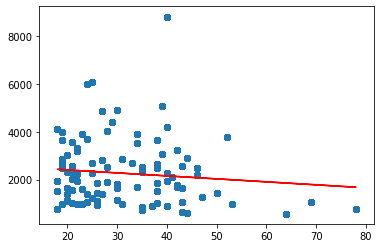

In [24]:
plt.plot(X_train,regressor.predict(X_train), color='red')
plt.scatter(df['age'],df['annual_salary'])